<a href="https://colab.research.google.com/github/yashveersinghsohi/Kaggle_Competitions/blob/TabularJan/Tabular%20Playground%20Series%20Jan%202021/Preprocessing%20and%20EDA/Kaggle_Tabular_Jan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
# Install Kaggle Library
!pip install kaggle

# Upload Kaggle API file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashveer0211","key":"41d03ce509e788d185e1ffde568d9abd"}'}

In [3]:
# Add API file to the correct directory (as per Kaggle Instructions)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change Permissions
!chmod 600 ~/.kaggle/kaggle.json

# Extract Data
!kaggle competitions download -c tabular-playground-series-jan-2021
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 71.8MB/s]
100% 23.9M/23.9M [00:00<00:00, 42.6MB/s]

 65% 25.0M/38.4M [00:00<00:00, 54.6MB/s]
100% 38.4M/38.4M [00:00<00:00, 86.6MB/s]
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [6]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [7]:
sample_submission.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


# EDA

## Null values

Calling Info on each file, we see that there are no null values.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   target  200000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


## Data Distribution 

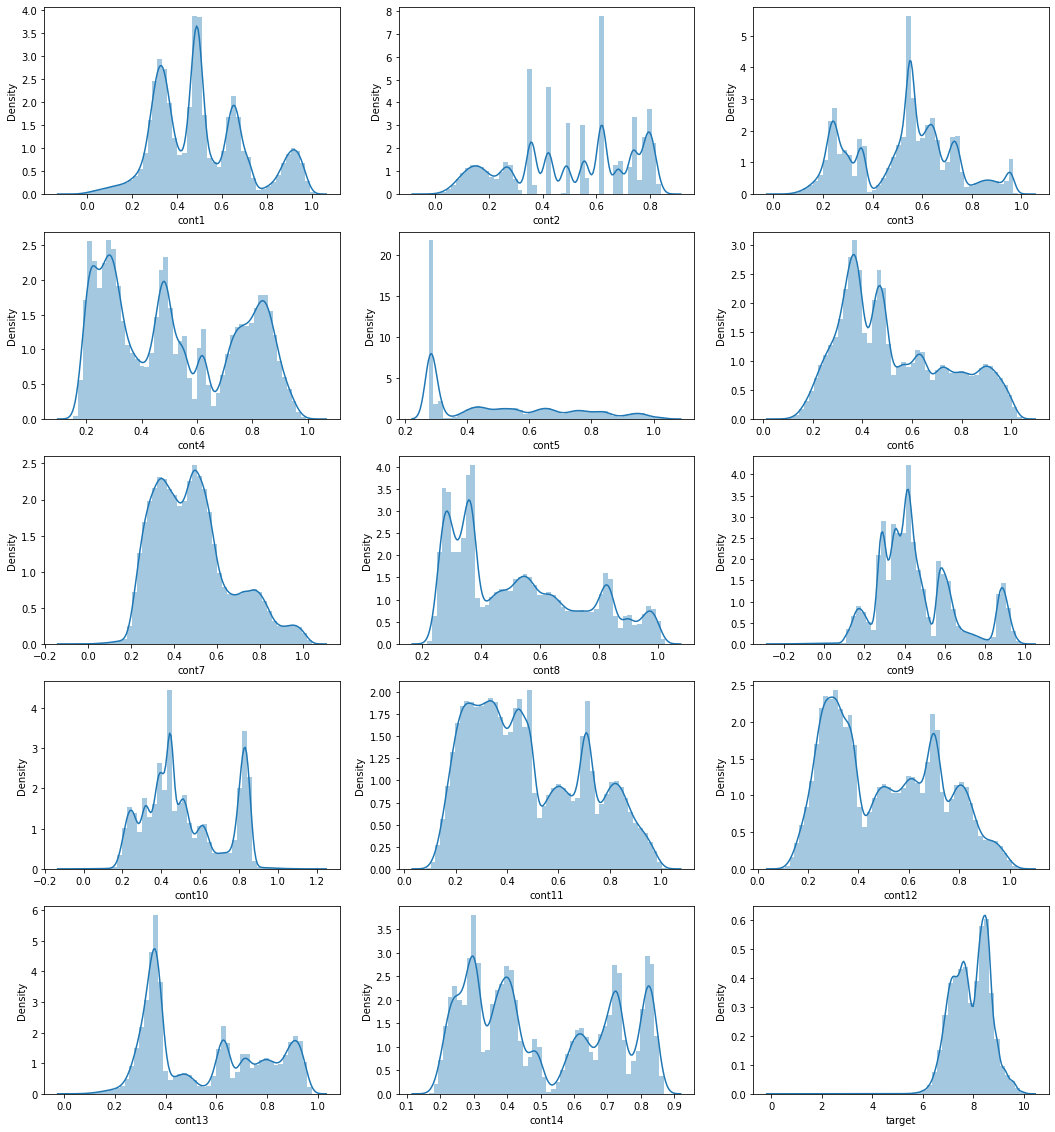

In [15]:
fig, ax = plt.subplots(5, 3, figsize = (18, 20))

for i, col in enumerate(train.iloc[:, 1:].columns):
  sns.distplot(train[col], ax = ax[i//3, i%3])

## Heatmap

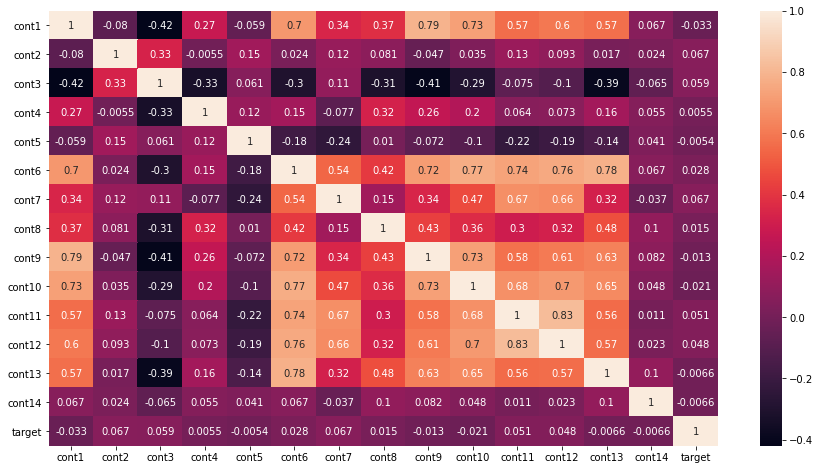

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(train.iloc[:, 1:].corr(), annot = True)
plt.show()

## Exploring All Columns

### target